In [139]:
# import library

In [140]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.cross_validation import train_test_split as tts
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [141]:
# import data from cvs file

In [142]:
df = pd.read_csv('kc_house_data.csv')
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,6762700020,20141013T000000,7700000.0,6,8.0,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
1,9808700762,20140611T000000,7060000.0,5,4.5,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [144]:
# almost all fields are numerical data type 
# get the correlation information

In [145]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016798,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016798,1.000000,0.308338,0.525133,0.702042,0.089654,0.256787,0.266331,0.397347,0.036392,0.667462,0.605565,0.323836,0.053981,0.126443,-0.053168,0.306919,0.021570,0.585372,0.082454
bedrooms,0.001286,0.308338,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525133,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702042,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089654,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256787,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266331,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397347,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036392,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [146]:
# from above init corr infor, we find fields bathrooms, sqft_living, sqft_lot,sqft_above, grade, sqft_living15 
# are highly related

In [147]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401819e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673618e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


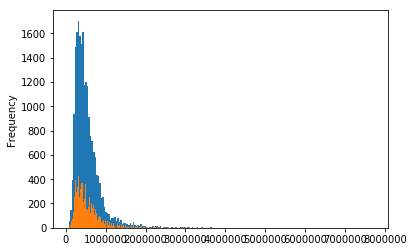

In [148]:
df.price.plot(kind='hist', bins=200)
plt.hist(df.price, bins=1000);

In [149]:
df[df['price'] > 4000000].count()

id               11
date             11
price            11
bedrooms         11
bathrooms        11
sqft_living      11
sqft_lot         11
floors           11
waterfront       11
view             11
condition        11
grade            11
sqft_above       11
sqft_basement    11
yr_built         11
yr_renovated     11
zipcode          11
lat              11
long             11
sqft_living15    11
sqft_lot15       11
dtype: int64

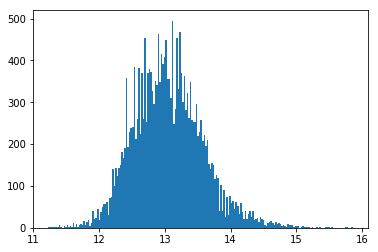

In [150]:
plt.hist(np.log(df.price), bins = 200);
# use ;, will skip array value, only show histgram

In [151]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [152]:
# let's do feilds clearning and check one by one, to make sure all the cirtial fields of linear regression should be 
# normal ditributed including y price 

In [153]:
# sqft_living 

In [154]:
# df.sqft_living.plot()

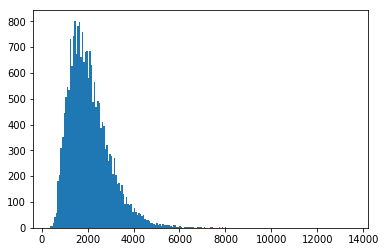

In [155]:
plt.hist(df.sqft_living, bins = 200);

In [156]:
df[df['sqft_living'] > 6000].count()
# most of sqft_living is around 2000, > 60000 is the outfilter 

id               68
date             68
price            68
bedrooms         68
bathrooms        68
sqft_living      68
sqft_lot         68
floors           68
waterfront       68
view             68
condition        68
grade            68
sqft_above       68
sqft_basement    68
yr_built         68
yr_renovated     68
zipcode          68
lat              68
long             68
sqft_living15    68
sqft_lot15       68
dtype: int64

In [157]:
# bedroom

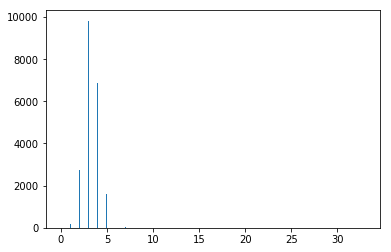

In [158]:
plt.hist(df.bedrooms, bins = 500);

In [159]:
df[df['bedrooms'] > 10].count()
# bedroom more than 10 should be outfilter 

id               2
date             2
price            2
bedrooms         2
bathrooms        2
sqft_living      2
sqft_lot         2
floors           2
waterfront       2
view             2
condition        2
grade            2
sqft_above       2
sqft_basement    2
yr_built         2
yr_renovated     2
zipcode          2
lat              2
long             2
sqft_living15    2
sqft_lot15       2
dtype: int64

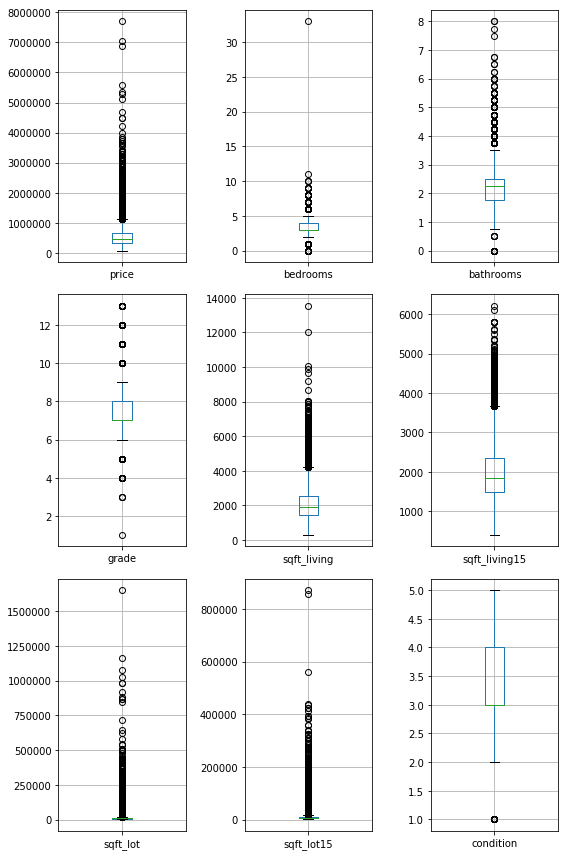

In [160]:
fig = plt.figure(figsize =(8,12))
ax1 = plt.subplot(331)
ax2 = plt.subplot(332)
ax3 = plt.subplot(333)
ax4 = plt.subplot(334)
ax5 = plt.subplot(335)
ax6 = plt.subplot(336)
ax7 = plt.subplot(337)
ax8 = plt.subplot(338)
ax9 = plt.subplot(339)

df.boxplot(column = 'price', ax=ax1)
df.boxplot(column = 'bedrooms', ax=ax2)
df.boxplot(column = 'bathrooms', ax=ax3)
df.boxplot(column = 'grade', ax = ax4)
df.boxplot(column = 'sqft_living', ax =ax5)
df.boxplot(column = 'sqft_living15', ax =ax6)
df.boxplot(column = 'sqft_lot', ax =ax7)
df.boxplot(column = 'sqft_lot15', ax =ax8)
df.boxplot(column = 'condition', ax =ax9)

plt.suptitle('')
plt.tight_layout()
# draw box plot to view the range and outfilter 

In [1]:
# DataFrame.quantile(q=0.5, axis=0, numeric_only=True, interpolation='linear')[source]¶
# Return values at the given quantile over requested axis, a la numpy.percentile.

In [162]:
df.quantile(0.99).astype('int')

id               9558728047
price               1968800
bedrooms                  6
bathrooms                 4
sqft_living            4978
sqft_lot             213008
floors                    3
waterfront                0
view                      4
condition                 5
grade                    11
sqft_above             4370
sqft_basement          1660
yr_built               2014
yr_renovated           2008
zipcode               98199
lat                      47
long                   -121
sqft_living15          4080
sqft_lot15           157687
Name: 0.99, dtype: int64

In [163]:
outliers = df.quantile(0.99)
outliers

id               9.558728e+09
price            1.968800e+06
bedrooms         6.000000e+00
bathrooms        4.250000e+00
sqft_living      4.978800e+03
sqft_lot         2.130080e+05
floors           3.000000e+00
waterfront       0.000000e+00
view             4.000000e+00
condition        5.000000e+00
grade            1.100000e+01
sqft_above       4.370000e+03
sqft_basement    1.660000e+03
yr_built         2.014000e+03
yr_renovated     2.008000e+03
zipcode          9.819900e+04
lat              4.777269e+01
long            -1.217830e+02
sqft_living15    4.080000e+03
sqft_lot15       1.576870e+05
Name: 0.99, dtype: float64

In [164]:
# filtering data
# remove outliers

In [165]:
outliers = df.quantile(0.95)
x = df[df['price'] < outliers['price']]
x = x[df['bedrooms'] < outliers['bedrooms']]
x = x[df['sqft_living'] < outliers['sqft_living']]
x.shape

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


(18566, 21)

In [166]:
df.groupby(['zipcode','waterfront'])[['price']].mean()

price
zipcode waterfront              
98001   0           2.808047e+05
98002   0           2.342840e+05
98003   0           2.941113e+05
98004   0           1.338475e+06
        1           7.060000e+06
98005   0           8.102897e+05
98006   0           8.541486e+05
        1           1.575000e+06
98007   0           6.172540e+05
98008   0           5.823459e+05
        1           2.572222e+06
98010   0           4.236660e+05
98011   0           4.903771e+05
98014   0           4.556171e+05
98019   0           4.248151e+05
98022   0           3.157093e+05
98023   0           2.835912e+05
        1           6.767500e+05
98024   0           5.806379e+05
98027   0           6.083567e+05
        1           2.400000e+06
98028   0           4.584551e+05
        1           1.600000e+06
98029   0           6.126427e+05
98030   0           2.961880e+05
98031   0           3.005399e+05
98032   0           2.512962e+05
98033   0           7.793085e+05
        1           3.445000e+06
98034   0           4.999041e+05
...                          ...
98117   0           5.768348e+05
98118   0           4.086684e+05
        1           1.548738e+06
98119   0           8.497148e+05
98122   0           6.345581e+05
98125   0           4.509153e+05
        1           1.538571e+06
98126   0           4.247346e+05
98133   0           3.869974e+05
98136   0           5.350664e+05
        1           1.413600e+06
98144   0           5.820655e+05
        1           2.750000e+06
98146   0           3.411372e+05
        1           1.002062e+06
98148   0           2.849086e+05
98155   0           4.000606e+05
        1           2.160000e+06
98166   0           4.176271e+05
        1           1.208333e+06
98168   0           2.403284e+05
98177   0           6.739644e+05
        1           1.300000e+06
98178   0           2.889567e+05
        1           9.193889e+05
98188   0           2.890783e+05
98198   0           2.879781e+05
        1           7.057000e+05
98199   0           7.887454e+05
        1           1.880000e+06

[99 rows x 1 columns]

In [167]:
df.grade.unique()

array([13, 11, 12, 10,  8,  9,  7,  6,  5,  4,  3,  1])

In [168]:
# create dummies columns for zipcode
x_zipcode = pd.get_dummies(x['zipcode'], drop_first=True)
x = pd.concat([x, x_zipcode], axis = 1)

In [169]:
print(type(x))
print(type([x,x_zipcode]))
print(type(x_zipcode))

<class 'pandas.core.frame.DataFrame'>
<class 'list'>
<class 'pandas.core.frame.DataFrame'>


In [170]:
x_zipcode.head(5)

,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
1089,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1090,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1091,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1093,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1094,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [171]:
x.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
1089,1552100135,20140609T000000,1150000.0,3,2.50,2850,10474,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1090,1925059194,20141209T000000,1150000.0,4,2.25,2840,20242,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1091,4166600115,20141121T000000,1150000.0,3,2.75,3230,75889,2.0,1,4,...,0,0,0,0,0,0,0,0,0,0
1093,868001030,20140915T000000,1150000.0,4,2.25,3740,18000,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0
1094,8805900430,20141229T000000,1150000.0,4,2.50,1940,4875,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0


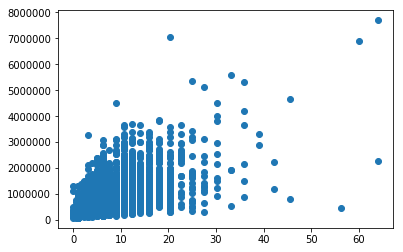

In [172]:
plt.scatter((df.bathrooms) ** 2, df.price)

In [173]:
# modify columns and additional filter 
x['built_age'] = 2018 - x['yr_built']
x['have_basement'] = np.where(x['sqft_basement'] > 0, 1, 0)
x['renovated'] = np.where(x['yr_renovated'] > 0, 1, 0)
x['weighted_bath'] = x['bathrooms'] ** 2
x['weighted_livingspace'] = x['sqft_living'] ** 2
x['diff_living'] = x['sqft_living'] - x['sqft_living15']
x['bed_bath_ratio'] = (x['bedrooms'] + 1) / (x['bathrooms'] + 1)


In [174]:
x.have_basement.value_counts()

0    11907
1     6659
Name: have_basement, dtype: int64

In [175]:
x.columns

Index([                  'id',                 'date',                'price',
                   'bedrooms',            'bathrooms',          'sqft_living',
                   'sqft_lot',               'floors',           'waterfront',
                       'view',            'condition',                'grade',
                 'sqft_above',        'sqft_basement',             'yr_built',
               'yr_renovated',              'zipcode',                  'lat',
                       'long',        'sqft_living15',           'sqft_lot15',
                        98002,                  98003,                  98004,
                        98005,                  98006,                  98007,
                        98008,                  98010,                  98011,
                        98014,                  98019,                  98022,
                        98023,                  98024,                  98027,
                        98028,                  9802

In [176]:
# Eefine x and y
y = x.price
x = x.drop(columns=['id', 'date', 'zipcode', 'lat', 'long', 'price', 'yr_renovated','sqft_basement','bathrooms', 'bedrooms', 'sqft_living', 'sqft_living15', 'yr_built'])

# x = x.drop(columns=['id', 'date'])


In [177]:
x.shape

(18566, 84)

In [179]:
# Train and test split
x_train, x_test, y_train, y_test = tts(x,y, train_size = .8, random_state = 10)
x_train.shape, y_train.shape,x_test.shape, y_test.shape

((14852, 84), (14852,), (3714, 84), (3714,))

In [181]:
# regression modeling
reg = linear_model.LinearRegression()
regmodel = reg.fit(x_train, y_train)
y_predtest = regmodel.predict(x_test)
y_predtest

array([152219.5454346 , 189283.12784136, 271308.92081958, ...,
       494472.49206369, 604366.09937086, 670407.11962805])

In [183]:
# Root Mean Square
RMS = mean_squared_error(y_test, y_predtest) ** 0.5
RMS

83474.85330602825

In [191]:
# Lasso Regression Modeling
from sklearn.linear_model import Lasso
ls = Lasso()
ls.fit(x_train, y_train)
y_ls_predtest = ls.predict(x_test)
y_ls_predtest
ls_rmse = mean_squared_error(y_test, y_ls_predtest) ** 0.5
ls_rmse

83482.22766312436

In [192]:
# Ridge regression
from sklearn.linear_model import Ridge
rg = Ridge()
rg.fit(x_train, y_train)
y_rg_predtest = rg.predict(x_test)
rg_rmse = mean_squared_error(y_test, y_rg_predtest) ** 0.5
rg_rmse

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.537561e-17
  overwrite_a=True).T


83696.25873244822

In [193]:
r2_score(y_test, y_rg_predtest)

0.8211018122936233

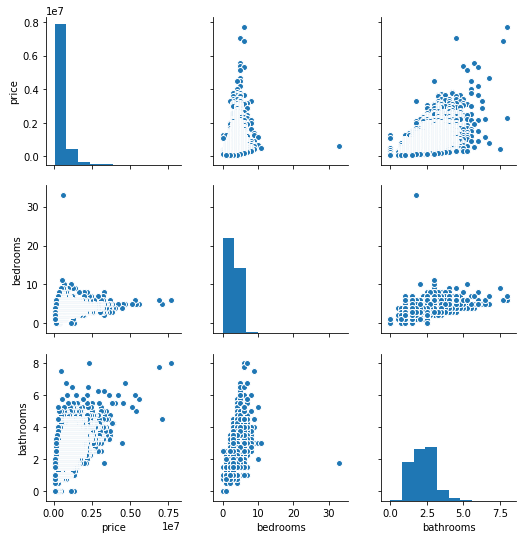

In [194]:
import seaborn as sns
sns.pairplot(df[['price','bedrooms','bathrooms']])